## Assignment A3b: Filtering

### John Mays (jkm100)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from A3a_jkm100 import *
from A1b_jkm100 import *
purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

### 1. Filtering

### 1a. A moving average filter

\begin{align*}
y_M[n] &= \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]\\
&=\frac{1}{M}(x[n]+x[n-1]+x[n-2]+\dots + x[0])\\
&= \frac{1}{M}x[n] + \frac{1}{M}(x[n-1]+x[n-2]+\dots + x[0])\\
&= \frac{1}{M}x[n] + \frac{1}{M}\sum_{k=0}^{M-2} x[n-k]\\
\frac{M}{M-1}y_M[n] &= \frac{M}{M-1}\frac{1}{M}x[n] + \frac{M}{M-1}\frac{1}{M}\sum_{k=0}^{M-2} x[n-k]\\
\frac{M}{M-1}y_M[n] &= \frac{M}{M-1}\frac{1}{M}x[n] + y_{M-1}[n-1]\\
y_M[n] &= \frac{1}{M}x[n] + \frac{M-1}{M}y_{M-1}[n-1] \textit{ (now, } \lambda = \frac{M-1}{M}\textit{)}\\
y_M[n] &= (1-\lambda)x[n] + \lambda y_{M-1}[n-1]\\
\therefore y[n] &= (1-\lambda)x[n] + \lambda y[n-1]
\end{align*}

As $\lambda$ becomes smaller, the equation emphasizes $x[n]$, the current value, more, there is less smoothing, and the filtered function essentially becomes more "jagged."  On the other hand, as $\lambda$ becomes larger, the filtered function becomes smoother, as $y[n]$ will be more similar to $y[n-1]$.

### 1b. Implementation

In [26]:
def movingavg(x, lam=0.5, centered=False):
    if centered:
        y_leftavg = np.copy(x.astype(float))
        for i in range(np.size(y_leftavg)):
            if i <= 0:
                y_leftavg[i] = lam*y_leftavg[i] + 0
            else:
                y_leftavg[i] = lam*y_leftavg[i] + (1-lam)*y_leftavg[i-1]
        y_rightavg = np.copy(x.astype(float))
        for i in np.flip(list(range(np.size(y_rightavg)))):
            if i >= np.size(y_rightavg)-1:
                y_rightavg[i] = lam*y_rightavg[i] + 0
            else:
                y_rightavg[i] = lam*y_rightavg[i] + (1-lam)*y_rightavg[i+1]
        y = (y_leftavg + y_rightavg)/2
    else:
        y = np.copy(x.astype(float))
        for i in range(np.size(y)):
            if i <= 0:
                y[i] = lam*y[i] + 0
            else:
                y[i] = lam*y[i] + (1-lam)*y[i-1]
    return y

In [27]:
def randprocess(N, sigma=1.0):
    x = np.zeros(N).astype(float, copy=False)
    x[0] = 0
    for i in range(1, np.size(x)):
        x[i] = x[i-1] + np.random.normal(loc=0, scale=sigma)
    return x

In [37]:
def plotsignalandfilter(signal, filtered_signal, title = "Original Signal with Filtered Signal"):
    assert np.size(signal)==np.size(filtered_signal)
    plt.figure(figsize=(8, 5), dpi=72)
    plt.plot(signal, c=purples[6], label="signal")
    plt.plot(filtered_signal, c=purples[3], label="filtered signal")
    plt.xlabel("Indices")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.show()
    return None

In [29]:
x = randprocess(100)
y = movingavg(x, lam=0.25)

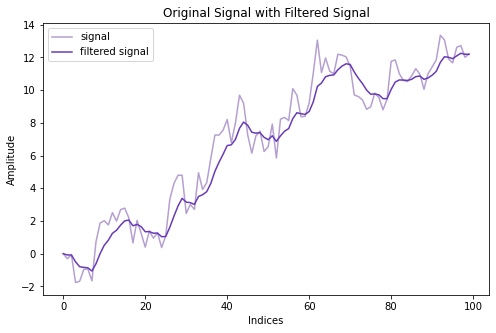

In [30]:
plotsignalandfilter(x, y)

In [38]:
t = np.linspace(0, 250, 251)
sine_signal = noisysignal(t, g= lambda x: sinewave(x, f=0.01),tau=0.0, T=np.size(t), sigma=0.25)
filtered_sine_signal = movingavg(sine_signal, lam=0.10, centered=False)

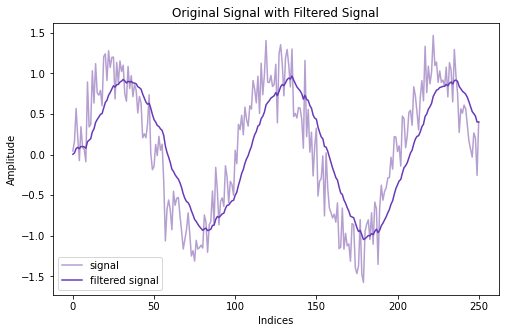

In [39]:
plotsignalandfilter(sine_signal, filtered_sine_signal)

### 1c. System delay

The delay is a product of the fact that the average is for all elements preceeding point of average; it incorporates none of the signal to the right of the index being averaged at.  If the index was in the middle of the values being sampled, then it would be appear more horizontally centered with the source signal.

Also of note: the severity of the lag will increase as $\lambda$ increases, because the proportional emphasis of the values to the left will increase in the filtered signal.

Demo: just change the boolean argument `centered` of `movingavg` from `False` to `True` and you can see the results

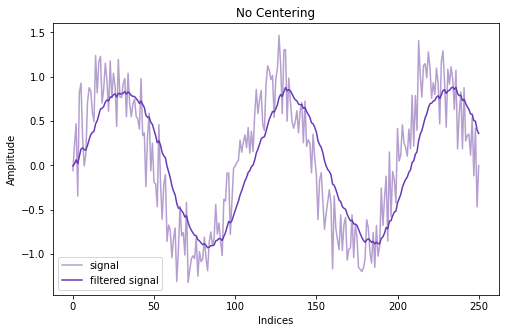

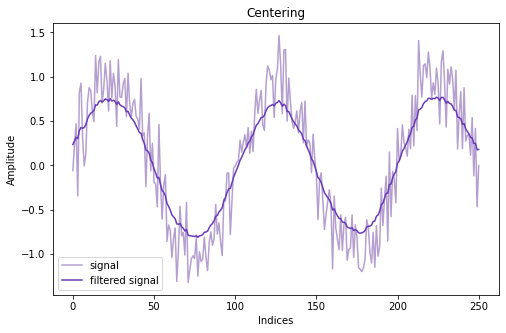

In [41]:
t = np.linspace(0, 250, 251)
sine_signal = noisysignal(t, g= lambda x: sinewave(x, f=0.01),tau=0.0, T=np.size(t), sigma=0.25)
filtered_sine_signal = movingavg(sine_signal, lam=0.10, centered=False)
plotsignalandfilter(sine_signal, filtered_sine_signal, title="No Centering")
filtered_sine_signal = movingavg(sine_signal, lam=0.10, centered=True)
plotsignalandfilter(sine_signal, filtered_sine_signal, title = "Centering")

### 2. IIR Filters

### 2a. Implementation

In [55]:
def filterIIR(x_old, a, b):
    assert type(a) == list or type(a) == np.ndarray
    assert type(b) == list or type(b) == np.ndarray
    x = np.copy(x_old)  # x and y should now be numpy arrays no matter what
    y = np.zeros(np.size(x))
    for i in range(np.size(x_old)):
        for j in range(np.size(b)):
            if (i-j) >= 0:
                y[i] += b[j]*x[i-j]
        for k in range(np.size(a)):
            if (i-1-k) >= 0:
                y[i] -= a[k]*y[i-1-k]
    return y

### 2b. First order low- and high-pass IIR filters

In [60]:
x = randprocess(150)

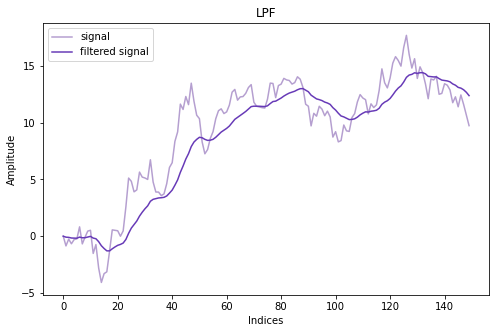

In [61]:
y = filterIIR(x, a=[-0.9], b=[0.1])
plotsignalandfilter(x, y, title="LPF")

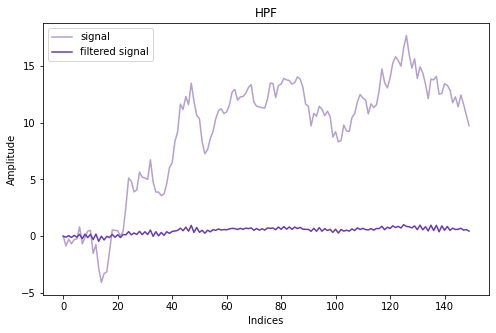

In [62]:
y = filterIIR(x, a=[0.9], b=[0.1])
plotsignalandfilter(x, y, title="HPF")

The difference equations are:

For LPF:
$$foo$$

For HPF:
$$bar$$

### 2c. Second order bandpass filters

### 2d. Characterizing the filter response

### 3. The impulse response function

### 3a. Deriving the impulse response function

### 3b. Impulse responses

### 4. Filtering with convolution

### 4a. Implementing convolution 

### 4b. FIR filtering

### 4c. Using matched filters to detect signals in noise